# Analyse der Poissonverteilung

In [23]:
using Revise, Plots
includet("run_tools.jl")
using .RunTools

In [24]:
#Definiere Inputpfade
in_path_P6_500 = "Data/messung_500V_P6_2700.txt";
in_path_P67_500 = "Data/messung_500V_P67_2700.txt";
in_path_P6_600 = "Data/messung_600V_P6_2700.txt";

#Definiere Outputpfade
out_path_P6_500 = "out/binomial/poisson/P6_500.txt";
out_path_P67_500 = "out/binomial/poisson/P67_500.txt";
out_path_P6_600 = "out/binomial/poisson/P6_600.txt";

## Extrahiere die Binomialverteilungen

In [25]:
#Extrahiere Binomialverteilung für Probe 6 bei 500V
D_t_P6_500 = 0.2;
b_P6_500 = 1;
data_P6_500 = run_binomial(in_path_P6_500, D_t_P6_500, b_P6_500, out_path_P6_500);

#Extrahiere Binomialverteilung für Probe 6 und 7 bei 500V
D_t_P67_500 = 0.2;
b_P67_500 = 1;
data_P67_500 = run_binomial(in_path_P67_500, D_t_P67_500, b_P67_500, out_path_P67_500);

#Extrahiere Binomialverteilung für Probe 6 bei 600V
D_t_P6_600 = 0.2; 
b_P6_600 = 1;
data_P6_600 = run_binomial(in_path_P6_600, D_t_P6_600, b_P6_600, out_path_P6_600);

## Funktionen zur Berechnung aller Parameter und erstellen der Plots

In [26]:
calc_N(data) = sum(data[:,2]);
calc_m(data,N) = sum(data[:,2] .* data[:,1]) / N;
calc_sigma_sq(data,N) = 1/(N-1) * sum((data[:,1] .- calc_m(data,N)).^2 .* data[:,2]);

struct PoissonDist
    N::Int
    m::Float64
    p::Array{Float64,1}
    sigma_sq::Float64
end;


function calc_theo_poisson(data,m,N)
    λ = m
    p = zeros(size(data)[1])
    for i in 1:size(data)[1]
        p[i] = N*λ^data[i,1] * exp(-λ) / factorial(big(data[i,1]))
    end
    return p
end;


function calc_parameters(data)
    N = calc_N(data)
    m = calc_m(data,N)
    p = calc_theo_poisson(data,m,N)
    sigma_sq = calc_sigma_sq(data,N) 

    poisson_dist = PoissonDist(N,m,p,sigma_sq)

    return poisson_dist
end;


function plot_data_and_theo(data, title::String)
    fig = bar(
        data[:,1],data[:,2],
        label="Messung",
        xlabel="Anzahl der Kernzerfälle",
        ylabel="Anzahl der Intervalle",
        title=title
    )
    dist = calc_parameters(data)
    plot!(data[:,1], dist.p, label="Theorie", seriestype=:steppost, lw=2)
    return fig, dist
end;


function print_params(dist::PoissonDist)
    println("N = ", dist.N)
    println("m = ", dist.m)
    println("σ² = ", dist.sigma_sq)
end;

## Plotte Ergebnisse

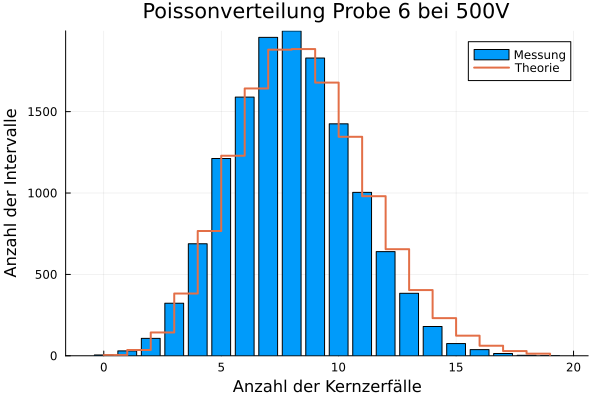

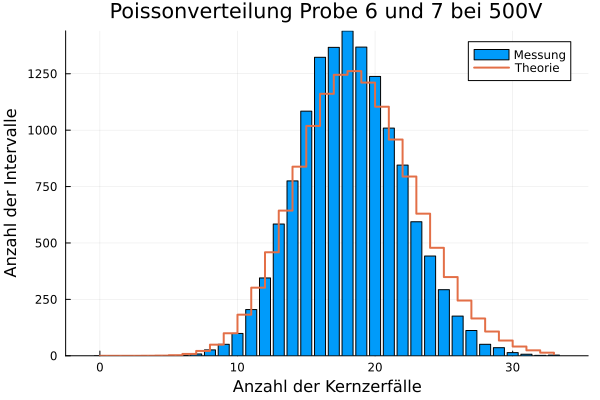

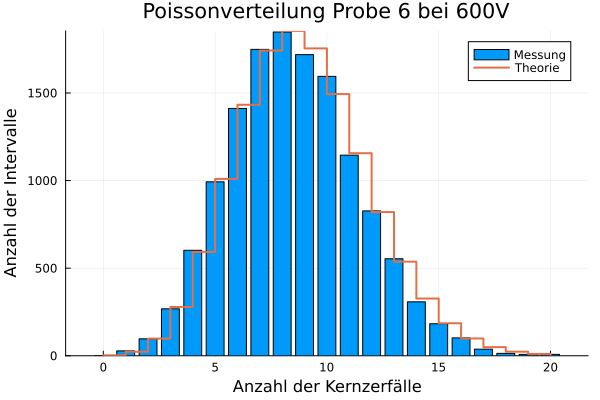

In [27]:
fig_P6_500, dist_P6_500 = plot_data_and_theo(data_P6_500, "Poissonverteilung Probe 6 bei 500V");
fig_P67_500, dist_P67_500 = plot_data_and_theo(data_P67_500, "Poissonverteilung Probe 6 und 7 bei 500V");
fig_P7_600, dist_P6_600 = plot_data_and_theo(data_P6_600, "Poissonverteilung Probe 6 bei 600V");
display(fig_P6_500);
display(fig_P67_500);
display(fig_P7_600);

## Gebe alle Parameter aus

In [28]:
println("Probe 6 bei 500V");
print_params(dist_P6_500);

println("");

println("Probe 6 und 7 bei 500V");
print_params(dist_P67_500);

println("");

println("Probe 6 bei 600V");
print_params(dist_P6_600);

Probe 6 bei 500V
N = 13499
m = 8.016149344395881
σ² = 7.000183689651926

Probe 6 und 7 bei 500V
N = 13499
m = 18.234387732424626
σ² = 13.897199378767853

Probe 6 bei 600V
N = 13499
m = 8.514630713386177
σ² = 8.348337563646927


## Speichere Plots

In [29]:
savefig(fig_P6_500, "Plots/Poisson/P6_500.png");
savefig(fig_P67_500, "Plots/Poisson/P67_500.png");
savefig(fig_P7_600, "Plots/Poisson/P6_600.png");